# Определение перспективного тарифа для телеком-компании

Описание проекта:

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Содержание проекта

<b> Шаг 1. Изучить общую информацию   <b>
    
Доступные данные:
    
- /datasets/calls.csv. 
    
- /datasets/internet.csv. 
    
- /datasets/messages.csv.
    
- /datasets/tariffs.csv.
    
- /datasets/users.csv. 
  

<b> Шаг 2. Подготовка данных <b>
    
- Приведите данные к нужным типам;
    
- Найдите и исправьте ошибки в данных;


<b> Шаг 3. Анализ данных <b>
    
- Опишите поведение клиентов оператора, исходя из выборки;
    
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
    
- Посчитайте среднее количество, дисперсию и стандартное отклонение;
    
- Постройте гистограммы. Опишите распределения.

<b> Шаг 4. Проверьте гипотезы <b>
    
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Поясните:

- как вы формулировали нулевую и альтернативную гипотезы;
    
- какой критерий использовали для проверки гипотез и почему.

<b> Шаг 5. Общий вывод <b>

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_calls = pd.set_option('display.float_format', '{:,.2f}'.format)
df_calls = pd.read_csv('/datasets/calls.csv')

In [3]:
df_calls.info()
df_calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Text(0.5, 0, 'Минут')

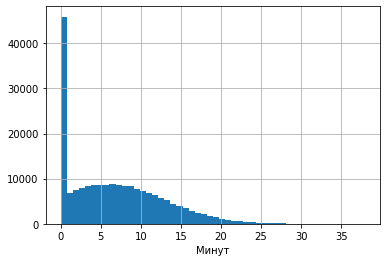

In [4]:
df_calls['duration'].hist(bins=50)
plt.xlabel('Минут')

Вывод: Пропусков нет, столбец call_date необходимо заменить тип на datetime.

In [5]:
df_internet = pd.set_option('display.float_format', '{:,.2f}'.format)
df_internet = pd.read_csv('/datasets/internet.csv')

In [6]:
df_internet.info()
df_internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Text(0.5, 0, 'МГб')

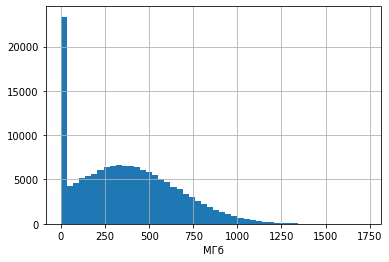

In [7]:
df_internet['mb_used'].hist(bins=50)
plt.xlabel('МГб')

Вывод: Пропусков нет, столбец session_date необходимо заменить тип на datetime.

In [8]:
df_messages = pd.set_option('display.float_format', '{:,.2f}'.format)
df_messages = pd.read_csv('/datasets/messages.csv')

In [9]:
df_messages.info()
df_messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Вывод: Пропусков нет, столбец message_date необходимо заменить тип на datetime.

In [10]:
df_tariffs = pd.set_option('display.float_format', '{:,.2f}'.format)
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [11]:
df_tariffs.info()
df_tariffs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Вывод: Данные выглядят нормально.

In [12]:
df_users = pd.set_option('display.float_format', '{:,.2f}'.format)
df_users = pd.read_csv('/datasets/users.csv')

In [13]:
df_users.info()
df_users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Вывод: Есть пропуски, столбец reg_date необходимо заменить тип на datetime

## Подготовка данных

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

### Исправляем ошибки в датасете df_calls

In [14]:
# приведем столбец call_date к datatime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [15]:
df_calls['duration'].value_counts()
# округляем минуты до целых, меняем тип на инт
#df_calls['duration']=round(df_calls['duration'] + 0.45)
import numpy as np
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')
#df_calls['duration'] = df_calls['duration'].astype('int')
df_calls['duration'].unique()

array([ 0,  3, 14,  6, 19,  8, 10,  5, 13, 16,  9,  2, 15, 11, 24, 12, 23,
        7, 20,  1,  4, 17, 21, 18, 25, 22, 27, 26, 29, 28, 30, 37, 31, 33,
       34, 32, 36, 35, 38])

### Исправляем ошибки в датасете df_internet

In [16]:
# приведем столбец session_date к datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [17]:
# округлим mb_used до целых, меняем тип на инт
#df_internet['mb_used'] = round(df_internet['mb_used'] + 0.45)
df_internet['mb_used'] = df_internet['mb_used'].astype('int')
df_internet['mb_used'].unique()

array([ 112, 1052, 1197, ..., 1345, 1123, 1387])

In [18]:
# Значения столбеца Unnamed совподают с индексами, удалим его.
df_internet.drop('Unnamed: 0', axis=1, inplace=True)
df_internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112,2018-11-25,1000
1,1000_1,1052,2018-09-07,1000
2,1000_2,1197,2018-06-25,1000
3,1000_3,550,2018-08-22,1000
4,1000_4,302,2018-09-24,1000
5,1000_5,399,2018-10-02,1000
6,1000_6,540,2018-09-07,1000
7,1000_7,415,2018-07-11,1000
8,1000_8,505,2018-10-08,1000
9,1000_9,345,2018-09-03,1000


### Исправляем ошибки в датасете df_messages

In [19]:
# меняем тип данных
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


### Исправляем ошибки в датасете df_users

In [20]:
# меняем тип данных
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Так как данные имеют значения для заказчика оставим как есть.

In [21]:
df_users.tail()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart


### Проверим на дубликаты

In [22]:
df_calls.duplicated().sum()

0

In [23]:
df_internet.duplicated().sum()

0

In [24]:
df_messages.duplicated().sum()

0

In [25]:
df_users.duplicated().sum()

0

Вывод: дубликатов нет.

### Подсчитаем количество сделанных звонков и израсходованных минут разговора по месяцам

In [26]:
# Добавим к датасету df_calls столбец month
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
5,1000_5,2018-11-02,0,1000,11
6,1000_6,2018-10-18,0,1000,10
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9
9,1000_9,2018-08-15,0,1000,8


In [27]:
count_calls = df_calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum']).reset_index()
count_calls.columns = ['user_id', 'month', 'calls', 'minutes']
count_calls.head()

,user_id,month,calls,minutes
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


### Подсчитаем количество отправленных сообщений по месяцам

In [28]:
# Добавим столбец month
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_messages.head(10)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


In [29]:
count_messages = df_messages.groupby(['user_id', 'month'])['id'].count().reset_index()
count_messages.columns = ['user_id', 'month', 'message']
count_messages.head()

,user_id,month,message
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Подсчитаем объем израсходованного интернет-трафика по месяцам

In [30]:
# Добавим столбец month
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet.head(10)

,id,mb_used,session_date,user_id,month
0,1000_0,112,2018-11-25,1000,11
1,1000_1,1052,2018-09-07,1000,9
2,1000_2,1197,2018-06-25,1000,6
3,1000_3,550,2018-08-22,1000,8
4,1000_4,302,2018-09-24,1000,9
5,1000_5,399,2018-10-02,1000,10
6,1000_6,540,2018-09-07,1000,9
7,1000_7,415,2018-07-11,1000,7
8,1000_8,505,2018-10-08,1000,10
9,1000_9,345,2018-09-03,1000,9


In [31]:
count_traffic = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
count_traffic.columns = ['user_id', 'month', 'mb_used']
count_traffic.head()

,user_id,month,mb_used
0,1000,5,2252
1,1000,6,23213
2,1000,7,13988
3,1000,8,14043
4,1000,9,14556


### Подсчитаем помесячную выручку с каждого пользователя

In [32]:
# Для подсчета месячной выручки обьеденим 3 таблицы в одну по столбцу month
count_income_month = pd.merge(count_calls, count_messages, how='outer', on=['user_id', 'month'])
count_income_month = pd.merge(count_income_month, count_traffic, how='outer', on=['user_id', 'month'])
count_income_month = pd.merge(count_income_month,
                              df_users.loc[:, ['user_id', 'city', 'tariff']],
                              how='outer', on='user_id')
count_income_month.head(10)

,user_id,month,calls,minutes,message,mb_used,city,tariff
0,1000,5.00,22.00,159.00,22.00,"2,252.00",Краснодар,ultra
1,1000,6.00,43.00,172.00,60.00,"23,213.00",Краснодар,ultra
2,1000,7.00,47.00,340.00,75.00,"13,988.00",Краснодар,ultra
3,1000,8.00,52.00,408.00,81.00,"14,043.00",Краснодар,ultra
4,1000,9.00,58.00,466.00,57.00,"14,556.00",Краснодар,ultra
5,1000,10.00,57.00,350.00,73.00,"14,690.00",Краснодар,ultra
6,1000,11.00,43.00,338.00,58.00,"14,745.00",Краснодар,ultra
7,1000,12.00,46.00,333.00,70.00,"9,808.00",Краснодар,ultra
8,1001,11.00,59.00,430.00,nan,"18,405.00",Москва,smart
9,1001,12.00,63.00,414.00,nan,"14,018.00",Москва,smart


In [33]:
# Проверим датасет на корректность слияния
count_income_month['user_id'].nunique()

500

Вывод: все 500 абонентов на месте.

In [34]:
# После слияния появились пропуски
# Это абоненты которые либо в какой то месяц не писали смс или не звонили, либо не пользвались интернетом
count_income_month.isna().sum()

user_id      0
month        2
calls       42
minutes     42
message    499
mb_used     13
city         0
tariff       0
dtype: int64

In [35]:
# Для подсчета выручки заменим пропуски в столбцах calls, minutes, message, mb_used на 0
count_income_month.loc[:, ['calls', 'minutes', 'message', 'mb_used']] = (
    count_income_month.loc[:, ['calls', 'minutes', 'message', 'mb_used']]
    .fillna(0)
)
count_income_month.isna().sum()

user_id    0
month      2
calls      0
minutes    0
message    0
mb_used    0
city       0
tariff     0
dtype: int64

In [36]:
# Есть два пропуска в стобце month
display(count_income_month[count_income_month['month'].isna()])
display(df_users.loc[df_users['user_id'] == 1128])
display(df_users.loc[df_users['user_id'] == 1371])

,user_id,month,calls,minutes,message,mb_used,city,tariff
3214,1128,nan,0.00,0.00,0.00,0.00,Волжский,ultra
3215,1371,nan,0.00,0.00,0.00,0.00,Омск,smart


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Вывод: Данные абоненты зарегистрировали и прекратили пользоваться тарифом в декабре из-за этого не корректно отображаются данные, заменим пропуск на 12 месяц.

In [37]:
count_income_month.loc[:, ['month']] = count_income_month.loc[:, ['month']].fillna(12)
count_income_month.isna().sum()

user_id    0
month      0
calls      0
minutes    0
message    0
mb_used    0
city       0
tariff     0
dtype: int64

In [38]:
# Функция расчета абоненской платы за месяц для Smart и Ultra
def income(args):
    if args['tariff'] == 'smart': 
        income_calls = (args['minutes'] - df_tariffs.loc[0, 'minutes_included']) * df_tariffs.loc[0, 'rub_per_minute']
        if income_calls < 0:
            income_calls = 0
        income_messages = (args['message'] - df_tariffs.loc[0, 'messages_included']) * df_tariffs.loc[0, 'rub_per_message']
        if income_messages < 0:
            income_messages = 0
        income_mb_used = ((args['mb_used'] - df_tariffs.loc[0, 'mb_per_month_included'])/1024) * df_tariffs.loc[0, 'rub_per_gb']
        if income_mb_used < 0:
            income_mb_used = 0
        income = income_calls + income_messages + income_mb_used + df_tariffs.loc[0,'rub_monthly_fee']
    elif args['tariff'] == 'ultra':
        income_calls = (args['minutes'] - df_tariffs.loc[0, 'minutes_included']) * df_tariffs.loc[0, 'rub_per_minute']
        if income_calls < 0:
            income_calls = 0
        income_messages = (args['message'] - df_tariffs.loc[0, 'messages_included']) * df_tariffs.loc[0, 'rub_per_message']
        if income_messages < 0:
            income_messages = 0
        income_mb_used = ((args['mb_used'] - df_tariffs.loc[0, 'mb_per_month_included'])/1024) * df_tariffs.loc[0, 'rub_per_gb']
        if income_mb_used < 0:
            income_mb_used = 0
        income = income_calls + income_messages + income_mb_used + df_tariffs.loc[0,'rub_monthly_fee']
    return income

In [39]:
count_income_month['income'] = count_income_month.apply(income, axis=1)
count_income_month.head(10)

,user_id,month,calls,minutes,message,mb_used,city,tariff,income
0,1000,5.00,22.00,159.00,22.00,"2,252.00",Краснодар,ultra,550.00
1,1000,6.00,43.00,172.00,60.00,"23,213.00",Краснодар,ultra,"2,113.79"
2,1000,7.00,47.00,340.00,75.00,"13,988.00",Краснодар,ultra,625.00
3,1000,8.00,52.00,408.00,81.00,"14,043.00",Краснодар,ultra,643.00
4,1000,9.00,58.00,466.00,57.00,"14,556.00",Краснодар,ultra,571.00
5,1000,10.00,57.00,350.00,73.00,"14,690.00",Краснодар,ultra,619.00
6,1000,11.00,43.00,338.00,58.00,"14,745.00",Краснодар,ultra,574.00
7,1000,12.00,46.00,333.00,70.00,"9,808.00",Краснодар,ultra,610.00
8,1001,11.00,59.00,430.00,0.00,"18,405.00",Москва,smart,"1,144.73"
9,1001,12.00,63.00,414.00,0.00,"14,018.00",Москва,smart,550.00


## Анализ данных

### Подсчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

In [40]:
df_total = (count_income_month
            .groupby(['tariff', 'month'])['minutes', 'message', 'mb_used', 'income'].median().reset_index()
)
df_total.head(10)

,tariff,month,minutes,message,mb_used,income
0,smart,1.00,162.50,15.00,"7,086.50",550.00
1,smart,2.00,258.00,20.00,"12,534.00",550.00
2,smart,3.00,409.00,23.00,"15,651.00",868.83
3,smart,4.00,368.50,28.00,"14,069.50",587.50
4,smart,5.00,433.00,30.00,"16,302.00",927.73
5,smart,6.00,400.00,28.00,"16,055.00",880.33
6,smart,7.00,414.00,29.00,"15,903.00",905.08
7,smart,8.00,432.00,27.00,"16,813.00",962.50
8,smart,9.00,435.00,30.00,"16,007.00",923.34
9,smart,10.00,427.50,30.00,"17,204.50","1,054.45"


### Подсчитаем среднее кол-ва минут разговора в месяц, сообщений в месяц и объём в месяц

In [41]:
# импорт библиотеки для построения графиков
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# проверим на выбросы
df_total[['minutes', 'message', 'mb_used', 'income']].describe()

,minutes,message,mb_used,income
count,24.00,24.00,24.00,24.00
mean,427.77,29.48,"16,490.54","1,239.67"
std,107.04,10.59,"3,558.09",544.47
min,162.50,5.50,"7,086.50",550.00
25%,402.25,24.50,"15,840.00",877.45
50%,432.50,28.50,"16,902.75","1,072.49"
75%,504.75,33.50,"18,738.00","1,742.35"
max,582.50,50.50,"21,935.00","2,408.50"


In [43]:
median_smart = df_total.query('tariff == "smart"')
median_ultra = df_total.query('tariff == "ultra"').reset_index(drop=True)
for index in ['minutes', 'message', 'mb_used', 'income']:
    print(f' {index}: smart = {round(median_smart[index].median())} | ultra = {round(median_ultra[index].median())}')

 minutes: smart = 421 | ultra = 510
 message: smart = 28 | ultra = 35
 mb_used: smart = 16031 | ultra = 18797
 income: smart = 914 | ultra = 1762


In [44]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


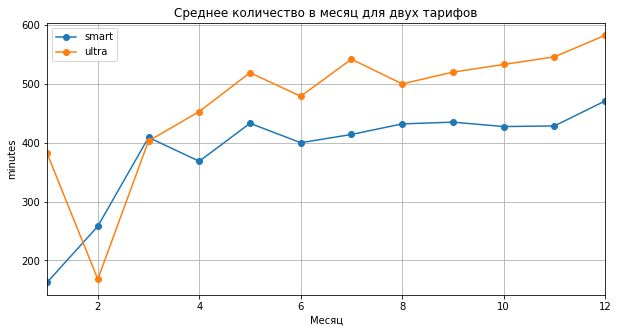

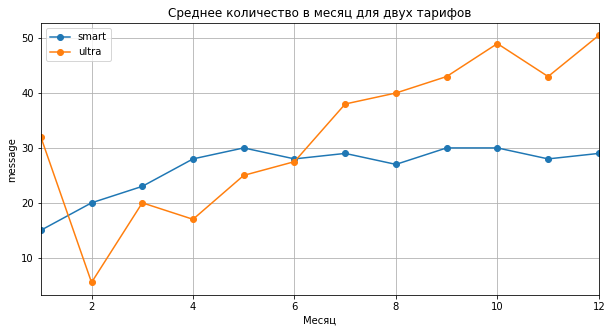

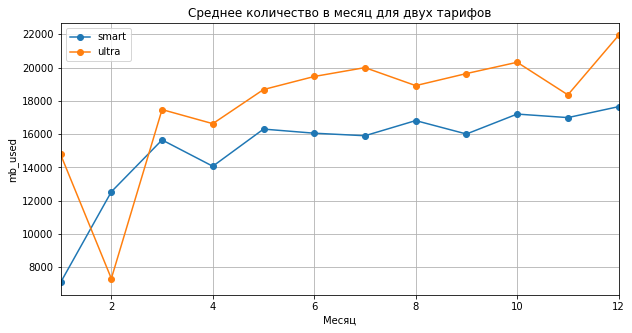

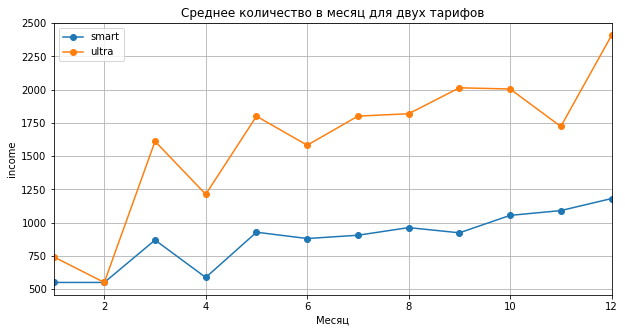

In [45]:
for index in ['minutes', 'message', 'mb_used', 'income']:
    (median_smart.sort_values(by=index, ascending=True)
        .groupby('month')[index].sum()
        .plot(x='month', y=index, style='o-', label='smart', grid=True, figsize=(10, 5)))
    (median_ultra.sort_values(by=index, ascending=True)
        .groupby('month')[index].sum()
        .plot(x='month', y=index, style='o-', label='ultra', grid=True, figsize=(10, 5)))
    
    plt.title('Среднее количество в месяц для двух тарифов')
    plt.xlabel('Месяц')
    plt.ylabel(index)
    plt.legend()
    plt.show();

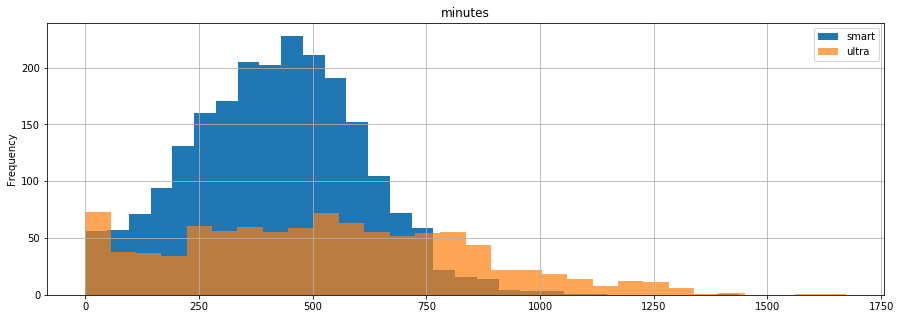

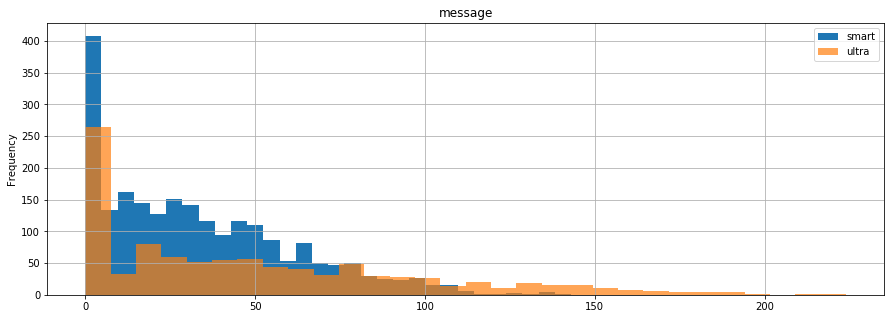

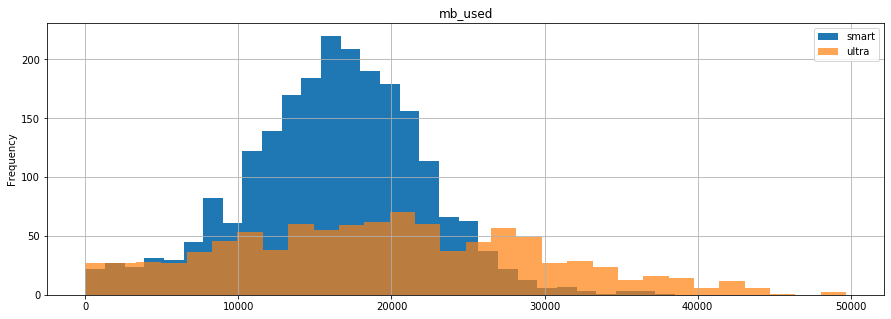

In [57]:
for index in ['minutes', 'message', 'mb_used']:
    count_income_month.loc[count_income_month.loc[:,'tariff'] == 'smart'][index].plot(kind = 'hist', bins = 30,
                                                                  label = 'smart', figsize = (15,5))
    count_income_month.loc[count_income_month.loc[:,'tariff'] == 'ultra'][index].plot(kind = 'hist', bins = 30,
                                                                  alpha =0.7, label = 'ultra',figsize = (15,5))
    plt.title(index)
    plt.grid()
    plt.legend()
    plt.show()

Вывод: В среднем абоненты не выходят за рамки тарифного плана.Абоненты тарифа smart приходиться докупать около ~10% интернет трафика. Абоненты тарифа ultra практически не пользуются СМС.

### Подсчитаем дисперсию и стандартное отклонение

In [48]:
# импортируем библиотеку для расчета дисперсии и стандартного отклонения
import numpy as np
var_df_total = df_total.pivot_table(index='tariff', values=['minutes', 'message', 'mb_used'],
                                   aggfunc=[np.median, np.var, np.std])
var_df_total.head()

median                           var                        std  \
         mb_used message minutes       mb_used message   minutes  mb_used   
tariff                                                                      
smart  16,031.00   28.00  420.75  8,485,919.20   22.08  7,784.27 2,913.06   
ultra  18,797.00   35.00  509.50 14,289,266.11  191.84 12,470.93 3,780.11   

                        
       message minutes  
tariff                  
smart     4.70   88.23  
ultra    13.85  111.67

Вывод: медиана и среднее значение практически не отличаются, значит выбросов нет.

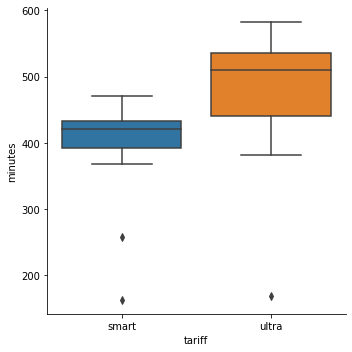

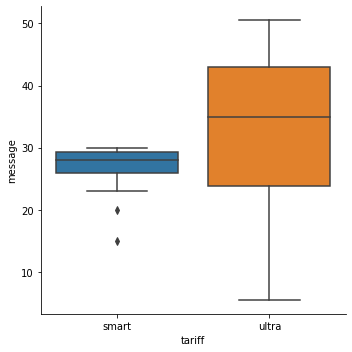

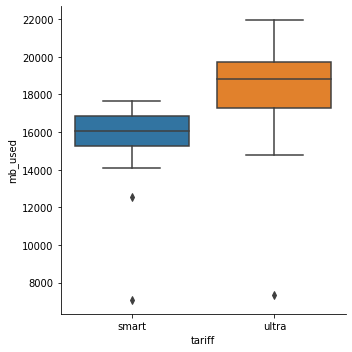

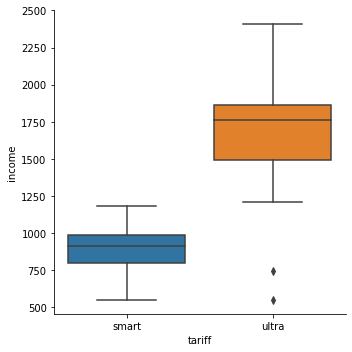

In [49]:
# диаграмма размаха
for index in ['minutes', 'message', 'mb_used', 'income']:
    sns.catplot(data=df_total, x='tariff', y=index, kind='box')

## Проверим гипотезы

### средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

H0 — Средняя выручка пользователей тарифов "Ультра" и "Смарт" равна

H1 — Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается

Уровень статистической значимости 0.05.

In [50]:
# импортируем библиотеку для проверки гипотез
import scipy.stats as st
alpha = 0.05 
results = st.ttest_ind(median_smart['income'], median_ultra['income'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00020822191334511194
Отвергаем нулевую гипотезу


Вывод: гипотеза Н0 не подтвердилась. Средняя выручка различается.

### средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

H0 — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

H1 — средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.

Уровень статистической значимости 0.05.

In [51]:
user_moscow = (count_income_month.query('city == "Москва"')
               .groupby('user_id')['income'].sum())
user_regions = (count_income_month.query('city != "Москва"')
               .groupby('user_id')['income'].sum())

alpha = 0.05 
results = st.ttest_ind(user_moscow, user_regions)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5278865261905457
Не получилось отвергнуть нулевую гипотезу


Вывод: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

## Общий вывод

<div class="alert alert-info"><b>Комментарий студента:</b> 
       
- Тариф smart самый массовый, 351 абонент, из анализа данных этой группы видно что абоненты в основном придерживаются рамок тарифа, чаще всего превышают лимит интерент трафика. 
    
- Можно предположить, что тариф ultra, 149 абонентов, пользуется спросом у состоятельных граждан, т.к. из данных видно они платят только абонет плату 1950р., звонки/интернет не превышают 50% от доступного лимита. 
   
- Возможно, для привлечения новых абонентов, компании «Мегалайн» стоит пересмотреть тариф smart в сторону увеличения интернет трафика.
    
- Средний доход в месяц тарифа ultra(~ 1700р.) практически в 2 раза выше тарифа smart(~ 900р.). 
    
    
</div>